In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from experiments.transformers.transformer_integration import load_args_from_text

In [42]:
test_results = "../experiments/test_results"
model_path = "../experiments/checkpoints"
model = "etsformer_BTC_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl2_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_exp_1"

args_path = os.path.join(model_path , model , "args.txt")
args = load_args_from_text(args_path)

args

{'model': 'etsformer',
 'data': 'BTC',
 'root_path_train': '../data/processed/3-hour-sample',
 'data_path_train': 'BTC-train.csv',
 'root_path_test': '../data/processed/3-hour-sample',
 'data_path_test': 'BTC-test.csv',
 'features': 'S',
 'target': 'midpoint',
 'freq': 'Sec',
 'normalise': True,
 'checkpoints': '../experiments/checkpoints',
 'timestamp': True,
 'experiment_name': 'Testing-Pyraformer',
 'run_name': 'Run-2-Diogos-Data',
 'seq_len': 96,
 'label_len': 48,
 'pred_len': 24,
 'enc_in': 1,
 'dec_in': 1,
 'c_out': 1,
 'factor': 5,
 'd_model': 512,
 'n_heads': 8,
 'e_layers': 2,
 'd_layers': 2,
 'd_ff': 2048,
 'dropout': 0.05,
 'attn': 'prob',
 'embed': 'timeF',
 'activation': 'gelu',
 'distil': True,
 'output_attention': False,
 'mix': True,
 'padding': 0,
 'window_size': '[4, 4]',
 'inner_size': 5,
 'top_k': 2,
 'batch_size': 32,
 'learning_rate': 0.0001,
 'loss': 'mse',
 'lr_adj': 'type1',
 'use_amp': False,
 'num_workers': 0,
 'itr': 1,
 'train_epochs': 5,
 'patience': 3,
 '

In [43]:
eval_metrics = np.load(os.path.join(test_results, model, "metrics.npy"))
pred = np.load(os.path.join(test_results, model, "pred.npy"))
true = np.load(os.path.join(test_results, model, "true.npy"))


pred.shape, true.shape

((2016, 24, 1), (2016, 24, 1))

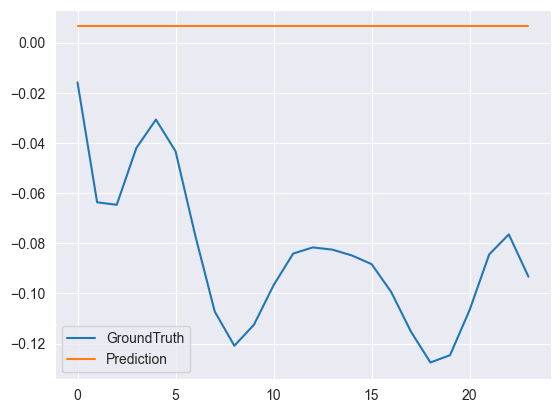

In [44]:
# draw OT prediction
plt.figure()
plt.plot(pred[1,:,-1], label='GroundTruth')
plt.plot(true[1,:,-1], label='Prediction')
plt.legend()
plt.show()

In [45]:
from experiments.transformers.train_pred import get_data
from sklearn.preprocessing import StandardScaler

test_data, test_loader = get_data(args, flag='test')

# assuming your data loader is named `loader` and it has an inverse scaler attribute
scaler = test_data.get_scaler()

test 2042


C:\Users\misko\OneDrive - University of Leeds\Year 4\Final Year Project\GitHub\src\data\transformers\data_loader.py:182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stamp['date'] = pd.to_datetime(df_stamp.date)


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Undo normalization on the data
true = scaler.inverse_transform(true.reshape(-1, 1)).reshape(true.shape)
pred = scaler.inverse_transform(pred.reshape(-1, 1)).reshape(pred.shape)

In [47]:
pred_price = pred[:, -1].tolist()
true_price = true[:, -1].tolist()

In [48]:
# print(pred_price)
# print(true_price)

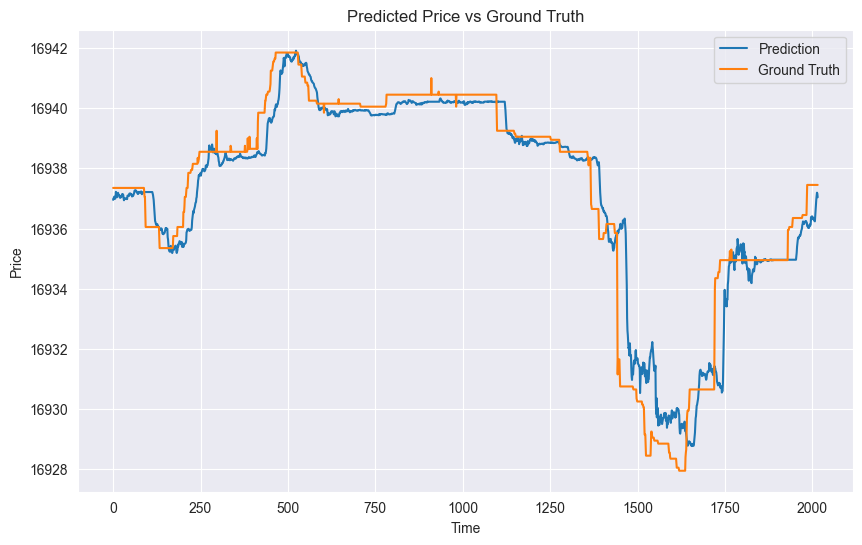

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(pred_price, label='Prediction')
plt.plot(true_price, label='Ground Truth')
plt.title('Predicted Price vs Ground Truth')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()